## **Part 4: Intro to ML**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#### **Encoders: LabelEncoder VS OrdinalEncoder**

In [2]:
df = pd.DataFrame({
        'Name': ['John', 'Anna', 'Peter', 'Linda', 'Bob', 'Mary', 'Chris', 'David'],
        'Age': [28, 34, 29, 42, 31, 37, 45, 29],
        'City': ['New York', 'Paris', 'Berlin', 'London', 'Madrid', 'Rome', 'Tokyo', 'Beijing'],
        'Salary': [75000, 82000, 67000, 92000, 73000, 88000, 91000, 78000],
        'Hired': ['2018-05-15', '2017-12-01', '2020-02-21', '2015-07-30',
                 '2019-08-12', '2016-04-18', '2014-11-23', '2020-09-05'],
        'Department': ['IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'Finance', 'IT']
    })

display(df)

,Name,Age,City,Salary,Hired,Department
0,John,28,New York,75000,2018-05-15,IT
1,Anna,34,Paris,82000,2017-12-01,Marketing
2,Peter,29,Berlin,67000,2020-02-21,IT
3,Linda,42,London,92000,2015-07-30,Finance
4,Bob,31,Madrid,73000,2019-08-12,HR
5,Mary,37,Rome,88000,2016-04-18,Marketing
6,Chris,45,Tokyo,91000,2014-11-23,Finance
7,David,29,Beijing,78000,2020-09-05,IT


In [3]:
##### LabelEncoder
name_encoder = LabelEncoder()
enc_name = name_encoder.fit_transform(df["Name"])

age_encoder = LabelEncoder()
enc_age = age_encoder.fit_transform(df["Age"])

print(enc_name)
print(enc_age)

##### But what if  we want to travse the info back
back = name_encoder.inverse_transform(enc_name)
print(back)

[4 0 7 5 1 6 2 3]
[0 3 1 5 2 4 6 1]
['John' 'Anna' 'Peter' 'Linda' 'Bob' 'Mary' 'Chris' 'David']


In [4]:
##### using iterations with LabelEncoder
alr_encod = {}
for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype == "bool":
        encod = LabelEncoder()
        df[col] = encod.fit_transform(df[col])
        alr_encod[col] = encod

for i, j in alr_encod.items():
    print(f"{i} : {j}")

display(df.head())

Name : LabelEncoder()
City : LabelEncoder()
Hired : LabelEncoder()
Department : LabelEncoder()


,Name,Age,City,Salary,Hired,Department
0,4,28,4,75000,4,2
1,0,34,5,82000,3,3
2,7,29,1,67000,6,2
3,5,42,2,92000,1,0
4,1,31,3,73000,5,1


#### **Using OrdinalEncoder**

But it tooks a lot of time to do it, however using loop doesn't help... We need to use ordinalEncoder

In [5]:
##### OrdinalEncoder
data = pd.DataFrame({
        'Name': ['John', 'Anna', None, 'Linda', 'Bob', 'Mary', 'Chris', 'David'],
        'Age': [28, 34, 29, None, 31, 37, 45, 29],
        'City': ['New York', 'paris', 'Berlin', 'london', 'Madrid', 'Rome', 'Tokyo', 'Beijing'],
        'Salary': [75000, 82000, 67000, 92000, -500, 88000, 91000, 78000],
        'Hired': ['2018-05-15', '2017-12-01', '2020-02-21', '2015-07-30',
                 '2019-08-12', '2016-04-18', 'invalid', '2020-09-05'],
        'Department': ['IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'Finance', 'IT']
})

ord_enc = OrdinalEncoder()
data_enc = ord_enc.fit_transform(data)
data_enc

array([[ 4.,  0.,  3.,  2.,  3.,  2.],
       [ 0.,  3.,  7.,  4.,  2.,  3.],
       [ 7.,  1.,  1.,  1.,  5.,  2.],
       [ 5., nan,  6.,  7.,  0.,  0.],
       [ 1.,  2.,  2.,  0.,  4.,  1.],
       [ 6.,  4.,  4.,  5.,  1.,  3.],
       [ 2.,  5.,  5.,  6.,  7.,  0.],
       [ 3.,  1.,  0.,  3.,  6.,  2.]])

#### **StandardScaler**

**Z-score normalization (StandardScaler formula)**
$$
x = \frac{x - \mu}{\sigma}
$$


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
data = np.array([
    [2, 160, 0.74],
    [10, 145, 0.44],
    [7, 201, 0.58],
    [6, 150, 0.59],
    [5, 188, 0.25],
    [10, 200, 0.5],
    [15, 180, 0.8],
    [14, 210, 0.3],
    [10, 190, 0.6],
    [12, 205, 0.4]
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.82773711, -1.02711239,  1.3050004 ],
       [ 0.23168499, -1.69989344, -0.4745456 ],
       [-0.5405983 ,  0.81182246,  0.3559092 ],
       [-0.79802606, -1.47563309,  0.4152274 ],
       [-1.05545382,  0.22874555, -1.6015914 ],
       [ 0.23168499,  0.76697039, -0.1186364 ],
       [ 1.51882379, -0.130071  ,  1.6609096 ],
       [ 1.26139603,  1.21549108, -1.3050004 ],
       [ 0.23168499,  0.31844969,  0.4745456 ],
       [ 0.74654051,  0.99123074, -0.7118184 ]])

In [8]:
##### StandardScaler with no library
class StandardScale:
    def __init__(self):
        super(StandardScale, self).__init__()
        self.mean = None
        self.std = None
    
    def fit(self, x: np.ndarray) -> np.ndarray:
        self.mean = np.mean(x, axis=0)
        self.std = np.std(x, axis=0)
        return self
    
    def transform(self, x: np.ndarray) -> np.ndarray:
        return (x - self.mean) / self.std
    
    def fit_transform(self, x: np.ndarray) -> np.ndarray:
        self.fit(x)
        return self.transform(x)

sclr = StandardScale()
scale_x = sclr.fit_transform(data)
scale_x

array([[-1.82773711, -1.02711239,  1.3050004 ],
       [ 0.23168499, -1.69989344, -0.4745456 ],
       [-0.5405983 ,  0.81182246,  0.3559092 ],
       [-0.79802606, -1.47563309,  0.4152274 ],
       [-1.05545382,  0.22874555, -1.6015914 ],
       [ 0.23168499,  0.76697039, -0.1186364 ],
       [ 1.51882379, -0.130071  ,  1.6609096 ],
       [ 1.26139603,  1.21549108, -1.3050004 ],
       [ 0.23168499,  0.31844969,  0.4745456 ],
       [ 0.74654051,  0.99123074, -0.7118184 ]])

##### **train_test_split**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt

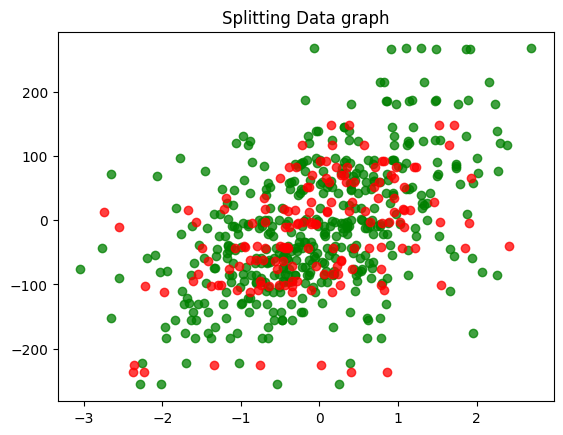

In [10]:
#### train test split with sklearn
x, y = make_regression(
    n_samples=150,
    n_features=4,
    noise=10,
    random_state=0
)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
plt.plot(x_train, y_train, "og", alpha = 0.75)
plt.plot(x_test, y_test, "or", alpha = 0.75)
plt.title("Splitting Data graph")
plt.show()

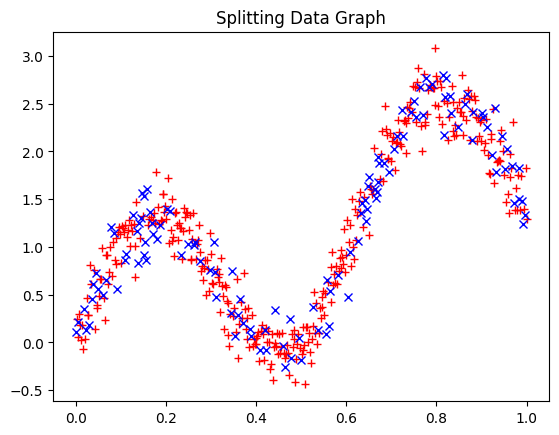

In [11]:
##### splitting data using numpy
def gen_data(x):
        N = len(x)
        xp = x*10
        y = np.sin(xp) + 0.2*xp + 0.2*np.random.randn(N)
        return y

def train_test_splitting(x, y, test_size=0.25, random=42):
    np.random.seed(random)
    total = len(x)
    idx = np.random.permutation(total)
    test = int(test_size * total)
    test_idx = idx[:test]
    train_idx = idx[test:]
    return x[train_idx], x[test_idx], y[train_idx], y[test_idx]

x = np.linspace(0, 1, num=500)
y = gen_data(x)
x_train, x_test, y_train, y_test = train_test_splitting(x, y, test_size=0.25, random=42)

plt.plot(x_train, y_train, "r+")
plt.plot(x_test, y_test, "bx")
plt.title("Splitting Data Graph")
plt.show()

## **Part 5: Iris Datasets**

In [12]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [13]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

,Name,Age,City,Salary,Hired,Department
0,4,28,4,75000,4,2
1,0,34,5,82000,3,3
2,7,29,1,67000,6,2
3,5,42,2,92000,1,0
4,1,31,3,73000,5,1


In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris.target #### you can also use iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris.target_names #### can also use iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris.feature_names #### can also use iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
for i in range(len(iris["target_names"])):
    print(iris["target_names"][i])

setosa
versicolor
virginica


In [19]:
for i in range(len(iris["feature_names"])):
    print(f"{i+1}: {iris['feature_names'][i]}")

1: sepal length (cm)
2: sepal width (cm)
3: petal length (cm)
4: petal width (cm)


In [20]:
### Apply the species to the datasets
species = iris["target_names"]
iris_df["target"] = iris["target"]
iris_df["target_name"] = iris_df["target"].apply(lambda x: species[x])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


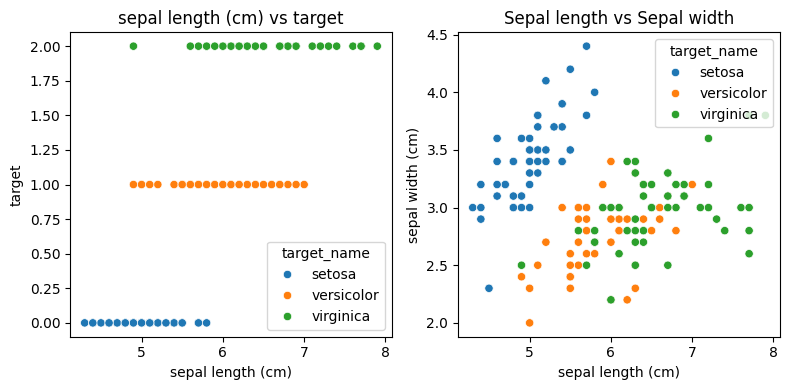

In [21]:
#### plot the graphs
col = "sepal length (cm)"
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.scatterplot(
    x = col,
    y = "target",
    hue = "target_name",
    data = iris_df,
    ax = axes[0]
)
axes[0].set_title(f"{col} vs target")

sns.scatterplot(
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="target_name",
    data=iris_df,
    ax=axes[1]
)
axes[1].set_title("Sepal length vs Sepal width")

plt.tight_layout()
plt.show()

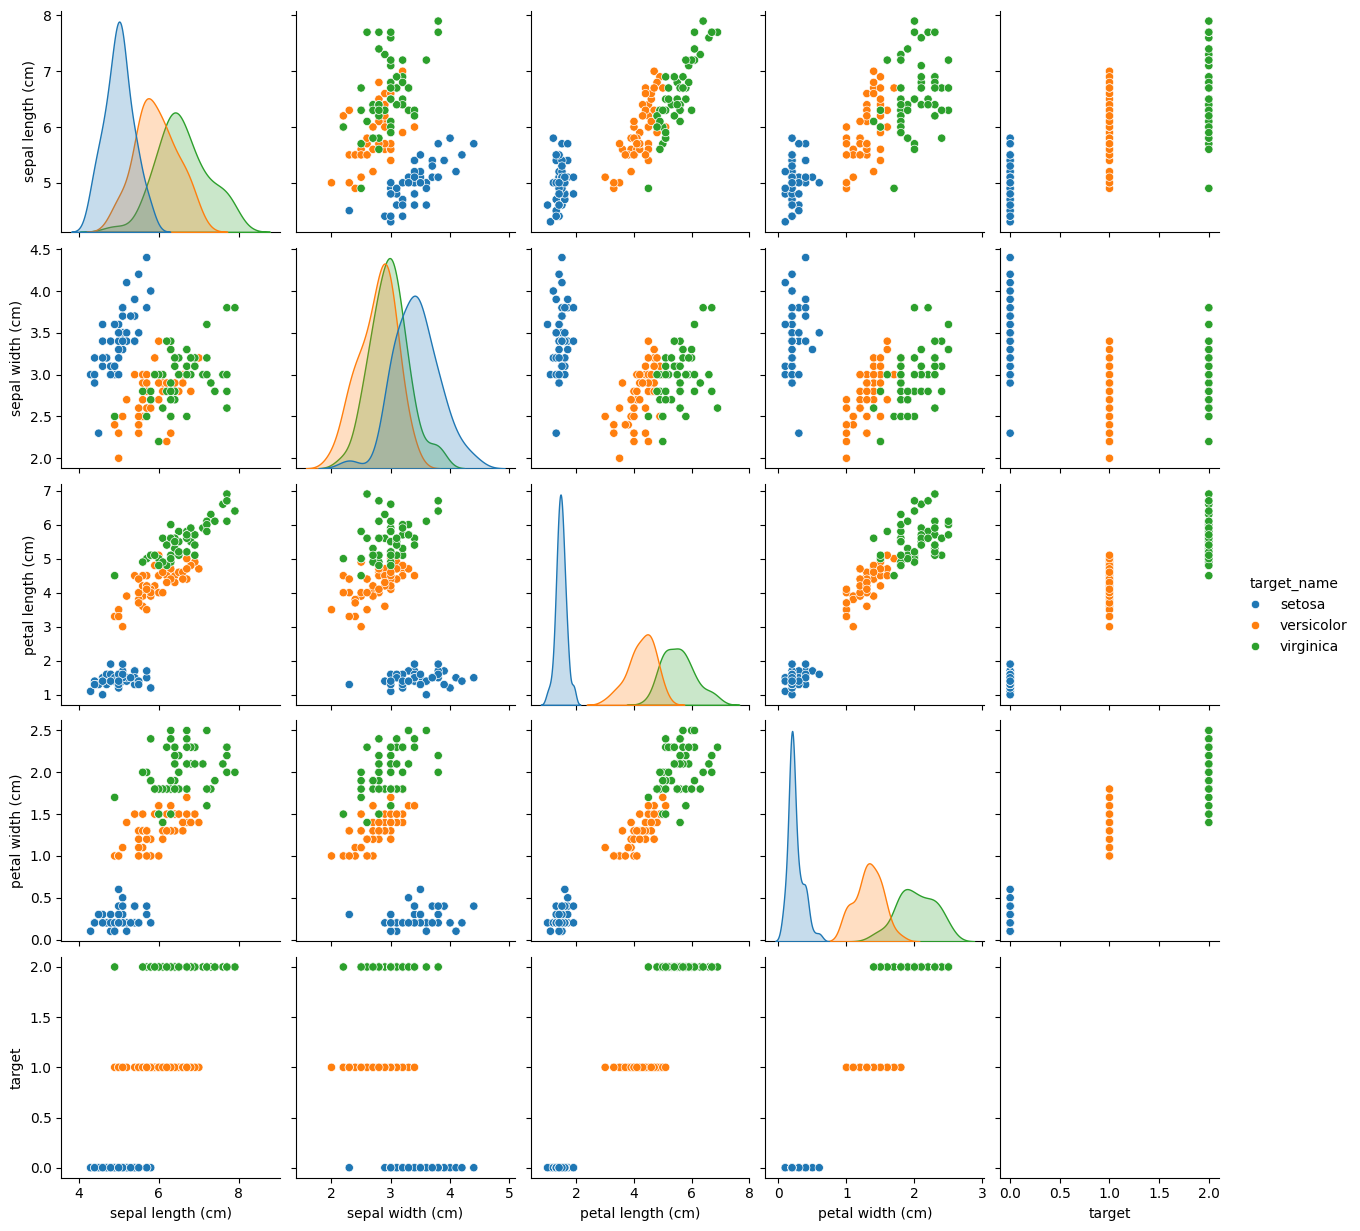

In [22]:
sns.pairplot(iris_df, hue = "target_name")
plt.show()

In [23]:
#### train the data

x = iris_df[iris.feature_names].values  
y = iris_df['target'].values 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

In [24]:
#### check the accuracy of manual train vs sklearn train
def single_pred(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2
    
manual_y_pred = np.array([single_pred(val) for val in x_train[:, 2]])
manual_y_pred == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [25]:
acc = np.mean(manual_y_pred == y_train)
print(f"Model accuracy: {acc * 100:.2f}%") 

Model accuracy: 95.54%


In [26]:
#### try with LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [27]:
#### since we already split the data
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Accuracy: {acc * 100}%")
print(f"MSE: {mse}")

Accuracy: 95.53571428571429%
MSE: 0.05263157894736842


In [28]:
model.score(x_test, y_test)

0.9473684210526315

## **Part 6: Gaussian Naive Bayes**

**Probability**
$$
\mathbf{Probability = \frac{Total\ Event}{Total\ Sample\ Space}}
$$

<br/>

$$
P(E) = \frac{n(E)}{n(S)}
$$

**Conditional Probability**
$$
\mathbf{P}(\boldsymbol{A|B}) = \frac{\mathbf{P}(\boldsymbol{A} \cap \boldsymbol{B})}{\mathbf{P}(\boldsymbol{B})} \quad \textbf{where } \mathbf{P}(\boldsymbol{B}) > 0
$$


---
#### **Bayes' Theorem:**

$$
\mathbf{P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}}
$$

---
### **Gaussian NB for continuous features**

**Gaussian probability density for a given feature xi, given class y**
$$
P(x_i \mid y) = \frac{1}{\sqrt{2\pi \sigma_{y,i}^2}} \exp\left(- \frac{(x_i - \mu_{y,i})^2}{2\sigma_{y,i}^2}\right)
$$

<br/>

**Likelihood under Naive Bayes assumption**
$$
P(x_1, x_2, \ldots, x_n \mid y) = \prod_{i=1}^n P(x_i \mid y) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma_{y,i}^2}} \exp\left(- \frac{(x_i - \mu_{y,i})^2}{2\sigma_{y,i}^2}\right)
$$

<br/>

**Posterior probability proportional to prior times likelihood**
$$
P(y \mid x_1, \ldots, x_n) \propto P(y) \cdot \prod_{i=1}^n P(x_i \mid y)
$$

<br/>

**Classification by MAP estimate**
$$
\hat{y} = \arg\max_y P(y) \cdot \prod_{i=1}^n P(x_i \mid y)
$$

---

#### **Example 1: Weather Dataset**

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

In [30]:
weather_df = pd.read_excel("D:/OneDrive/DME_2_FirstSem/IML/Datasets/weather_data_NB.xls")
display(weather_df.loc[:5])

,No,Outlook,Temperature,Humidity,Windy,Play
0,1,sunny,hot,high,False,no
1,2,sunny,hot,high,True,no
2,3,overcast,hot,high,False,yes
3,4,rainy,mild,high,False,yes
4,5,rainy,cool,normal,False,yes
5,6,rainy,cool,normal,True,no


In [31]:
#### For x col, we need to drop the no for the prediction
x = weather_df.drop(["Play", "No"], axis=1) 
y = weather_df["Play"]

ord_encod = OrdinalEncoder()
label_encod = LabelEncoder()

x_encod = ord_encod.fit_transform(x)
y_encod = label_encod.fit_transform(y)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_encod, y_encod, test_size=0.25, random_state=42)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [33]:
play_ls = weather_df["Play"].to_numpy()
play_ls

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [34]:
y_pred = gnb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc * 100}%")

Accuracy score: 100.0%


In [35]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [36]:
#### This is the data that I will use for predict 
### (the predicted condition)
A = {
    "Outlook": "sunny",
    "Temperature": "cool",
    "Humidity": "normal",
    "Windy": True
}

A_df = pd.DataFrame([A])
A_encoded = ord_encod.transform(A_df)
A_encoded

array([[2., 0., 1., 1.]])

In [37]:
model_probs = gnb.predict_proba(A_encoded)[0] 
model_probs

array([0.46901003, 0.53098997])

In [38]:
print(model_probs[0]) #### This is for No
print(model_probs[1]) #### This is for yes

0.4690100272171036
0.5309899727828966


In [39]:
###### This is the first method
pred_encoded = gnb.predict(A_encoded)[0]
prediction = label_encod.inverse_transform([pred_encoded])[0]

print(f"The prediction = {prediction}")

The prediction = yes


In [40]:
#### we can use another method
if model_probs[0] > model_probs[1]:
    print("yes")
elif model_probs[0] < model_probs[1]:
    print("yes")

yes


<hr>

### **load_digits() dataset**

In [41]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import MultinomialNB

In [42]:
digit = load_digits()
print(digit.data.shape)
print(digit.target.shape)

(1797, 64)
(1797,)


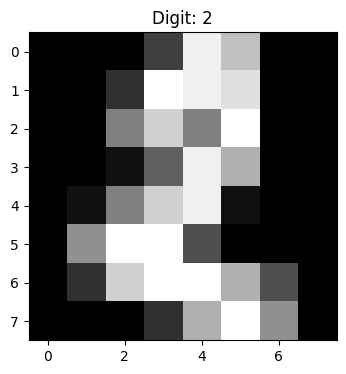

In [43]:
plt.figure(figsize=(6,4))
plt.title(f"Digit: {digit.target[2]}")
plt.imshow(digit.data[2].reshape(8,8), cmap="gray")
plt.grid(False)
plt.show()

In [44]:
x, y = digit.data, digit.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [45]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [46]:
predicted_val = x[3]
actual = y[3]

pred = model.predict(predicted_val.reshape(1,-1))
if actual == pred:
    print(f"The prediction is correct: {actual} = {pred}")
else:
    print(f"The prediction is wrong: {predicted_val} != {pred}")

#### The binary values
actual_bits = np.unpackbits(np.array([actual], dtype = np.uint8))
pred_bit = np.unpackbits(np.array([pred[0]], dtype=np.uint8))

print(f"Acutal binary: {actual_bits.flatten()}")
print(f"Predicted binary: {pred_bit}")

The prediction is correct: 3 = [3]
Acutal binary: [0 0 0 0 0 0 1 1]
Predicted binary: [0 0 0 0 0 0 1 1]


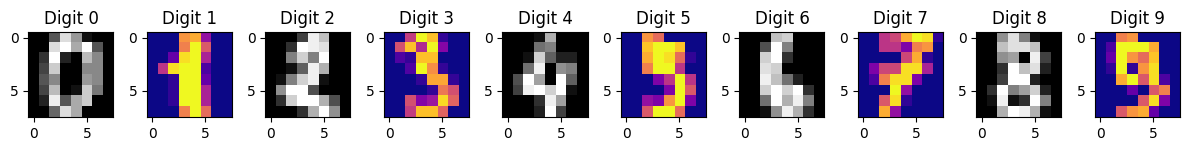

In [47]:
###### Plot 1-10 in horizontal axis

digit = load_digits()

plt.figure(figsize=(12, 8))
for i in range(10):
    color_map = "gray" if i%2 == 0 else "plasma"
    plt.subplot(1, 10, i+1)
    plt.imshow(digit.data[i].reshape(8,8), cmap = color_map)
    plt.title(f"Digit {i}")
    
plt.tight_layout()
plt.show()

<hr/>

## **Part 7: Decison Tree**

#### **Entropy**

$$
\mid \mathbf{Entropy(S) = -\sum_{i=1}^{n} p_i \log_2(p_i)}
$$

An estimated which tells the uncertainty, disorder and impurity from the dataset. These are the variable inside entropy formula:
- S = dataset
- p<sub>i</sub> is the probability of class i in the dataset

#### **Information Gain**
$$
\mid \mathbf{Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)}
$$

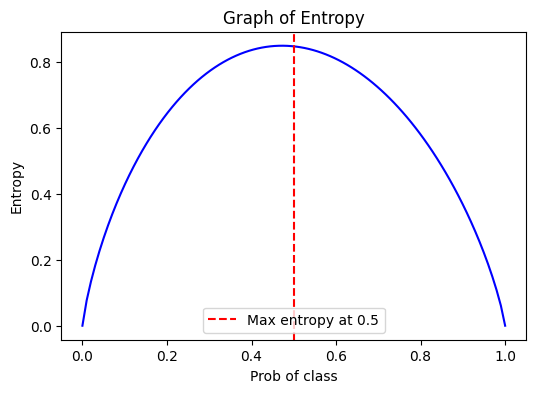

In [48]:
##### The graph of entropy
def entropy(p):
    p = np.clip(p, 1e-10, 1-1e-10)
    return -p * np.log2(p) - (1-p) * np.log(1-p)

p_val = np.linspace(0,1,100)
ent_val = entropy(p_val)
plt.figure(figsize=(6,4))
plt.plot(p_val, ent_val, color="blue")
plt.title("Graph of Entropy")
plt.xlabel("Prob of class")
plt.ylabel("Entropy")
plt.axvline(0.5, c="red", ls="--", label = "Max entropy at 0.5")
plt.legend()
plt.show()

#### **Some basic decision tree examples**

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [50]:
### let x = age, income
x = np.array([
    [25,40],
    [45,80],
    [35,60],
    [22,20],
    [52,90],
    [23,25],
    [43,70],
    [36,40],
])

# Lets assume that 0 = NOT buy, 1 = buy
y = np.array([1,1,1,0,1,0,1,0])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### For this, use entopy method
dtree = DecisionTreeClassifier(criterion="entropy") 
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_pred = dtree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Accuracy: {acc}")

MSE: 0.0
Accuracy: 1.0


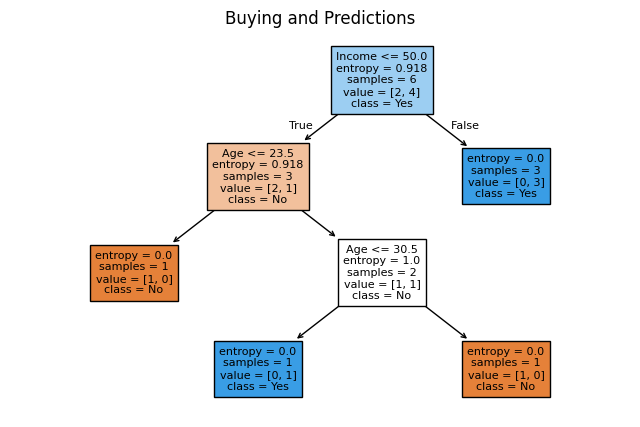

In [53]:
plt.figure(figsize=(8,5))
plot_tree(dtree,
          fontsize=8,
          filled=True,
          feature_names=["Age", "Income"],
          class_names=["No", "Yes"])
plt.title("Buying and Predictions")
plt.show()

In [54]:
print(export_text(dtree, feature_names=["Age", "Income"]))

|--- Income <= 50.00
|   |--- Age <= 23.50
|   |   |--- class: 0
|   |--- Age >  23.50
|   |   |--- Age <= 30.50
|   |   |   |--- class: 1
|   |   |--- Age >  30.50
|   |   |   |--- class: 0
|--- Income >  50.00
|   |--- class: 1



#### **Decision Tree for Regression**

In [55]:
from sklearn.tree import DecisionTreeRegressor

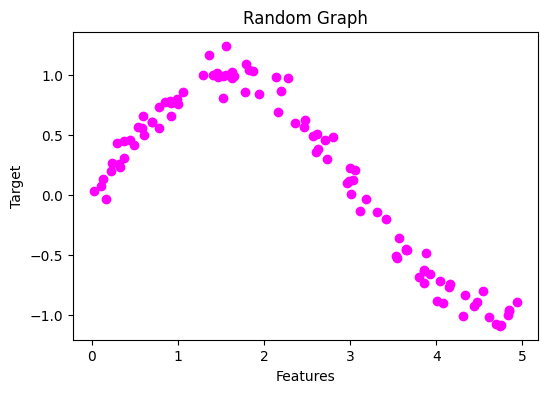

In [56]:
#### Let's generate some random values of x, y
np.random.seed(42)
x = np.sort(5 * np.random.rand(100, 1), axis = 0)
y = np.sin(x).ravel() + np.random.normal(0, 0.1, x.shape[0])

plt.figure(figsize=(6,4))
plt.scatter(x, y, c = "magenta", label = "Dataset")
plt.xlabel("Features")
plt.ylabel("Target")
plt.title("Random Graph")
plt.show()

In [57]:
##### For this time, I will use numpy to manually train
#### let's recall that we need to use numpy and split the data

def train_and_split(x, y, testsize=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    idx = np.arange(len(x))
    np.random.shuffle(idx)
    split = int(len(x) * (1 - testsize))

    x_train, x_test = x[idx[:split]], x[idx[split:]]
    y_train, y_test = y[idx[:split]], y[idx[split:]]

    return x_train, x_test, y_train, y_test

In [58]:
x_train, x_test, y_train, y_test = train_and_split(x, y, testsize=0.25)

dclassifier = DecisionTreeRegressor(max_depth=3) ##### This example we need to limit
dclassifier.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [59]:
y_pred = dclassifier.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.030875214945168556

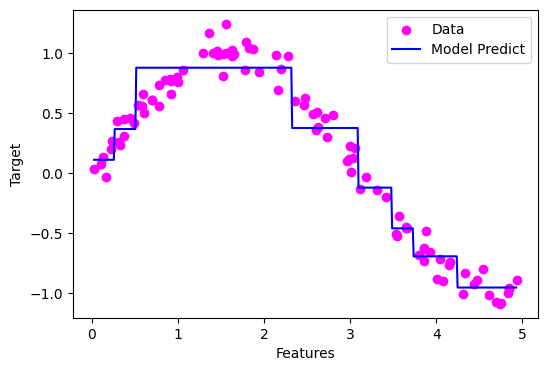

In [60]:
x_col = x[:, 0] 
y_col = y

x_grid = np.arange(x_col.min(), x_col.max(), 0.01).reshape(-1,1)
y_grid_pred = dclassifier.predict(x_grid)

plt.figure(figsize=(6,4))
plt.scatter(x_col, y_col, c="magenta", label="Data")
plt.plot(x_grid, y_grid_pred, c="blue", label="Model Predict")
plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()
plt.show()

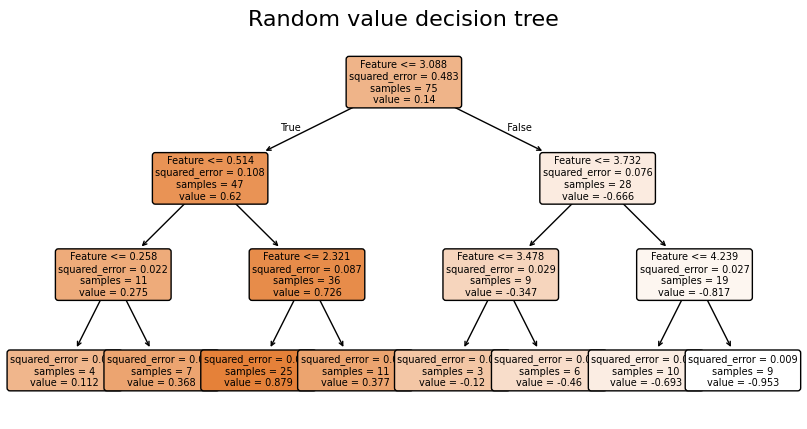

In [61]:
##### plot the decision tree
plt.figure(figsize=(10,5))
plot_tree(dclassifier, 
          feature_names=["Feature"], 
          filled = True, 
          fontsize=7, 
          rounded = True)

plt.title("Random value decision tree", fontsize = 16)
plt.show()

<hr/>

## **Part8: Optimization and Emerging**

#### **Recall: Calculus**

* Chain rule: 
  $$\frac{d g(u)}{d x} = \frac{d g(u)}{d u} \frac{d u}{d x}$$
* Derivative of cosine
  $$\frac{d \cos(f(x)}{d x} = - \sin(f(x)) \frac{d f(x)}{dx}$$
* Derivative of exponential
  $$\frac{d \exp(f(x)}{d x} = \exp(f(x)) \frac{d f(x)}{dx}$$
* Derivative of product
  $$\frac{d f(x) g(x)}{d x} = f(x) \frac{d g(x)}{dx} + g(x) \frac{d f(x)}{dx}$$

<hr/>

#### **Example: Chain rule**

$$
\begin{aligned}
y &= [\sin(4x^2 + 1)]^3 \\
\frac{dy}{dx} &= 3[\sin(4x^2 + 1)]^2 \cdot \cos(4x^2 + 1) \cdot (8x) \\
\frac{dy}{dx} &= 24x \sin^2(4x^2 + 1)\cos(4x^2 + 1)
\end{aligned}
$$

<hr/>

#### **Example 1:**

**Given the minimization function. Find the gradient and plot the function using matplotlib plot graph**

$$\min_u \cos(u-2) \cdot \exp(-(\frac{u}{10})^2) $$

$$
f(x) = e^{-\frac{x^2}{100}} \cdot \left( \sin(2 - x) - \frac{x}{50} \cdot \cos(2 - x) \right)
$$

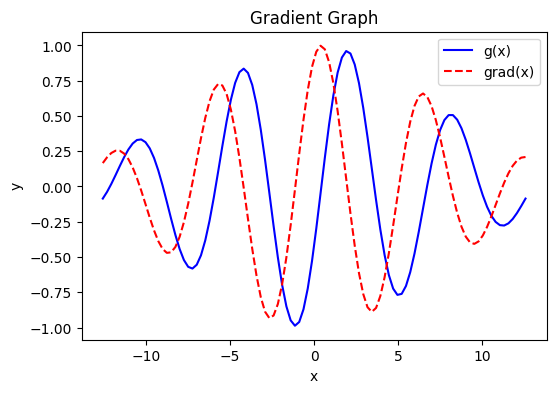

In [62]:
def g(x):
    return np.cos(x-2) * np.exp(-(x/10)**2)

def grad(x):
    return np.exp(-x**2/100) * (np.sin(2-x) - x/50 * np.cos(2-x))

x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = g(x)
y_grad = grad(x)

plt.figure(figsize=(6,4))
plt.title("Gradient Graph")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, c = "blue", label = "g(x)")
plt.plot(x, y_grad, c = "red", ls ="--", label="grad(x)")
plt.legend()
plt.show()

#### **Gradient Descent**

$$
x := x - \alpha \nabla g(x)
$$

Where:

- $\theta$ → parameter (or weight) being optimized  
- $\alpha$ → learning rate (step size)  
- $J(\theta)$ → cost (loss) function  


loss=
 [[-3.04583687]
 [-3.90888308]]
grad=
 [[-2.  ]
 [ 0.25]]
Minimizer:
 [[1.88600094]
 [1.88600094]]


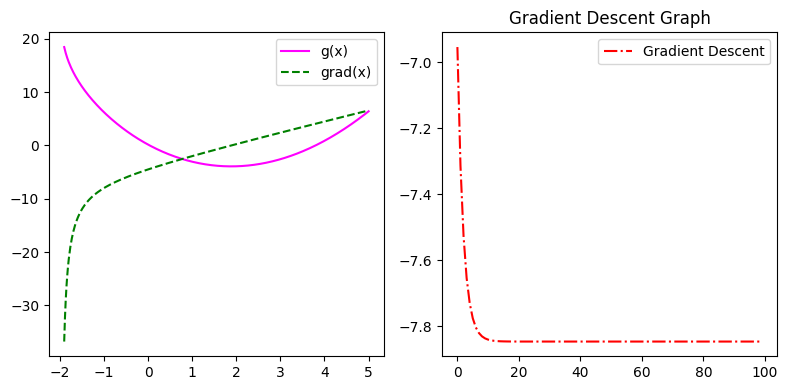

In [63]:
#### Gradient descent algorithm
def loss(u: np.ndarray) -> np.ndarray:
    return (u - 1.5) ** 2 - 3 * np.log(u + 2)

def grad(u: np.ndarray) -> np.ndarray:
    return 2 * (u - 1.5) - 3 / (u + 2)

def minimizer(u, lr, epochs):
    u_init = np.array(u, dtype=np.float64)
    losses = []
    for i in range(epochs):
        losses.append(np.sum(loss(u_init)))
        u_init -= grad(u_init) * lr
    
    return u_init, losses

if __name__ == "__main__":
    u = np.array([[1.0], [2.0]])
    print('loss=\n', loss(u))
    print('grad=\n', grad(u))
    
    u_final, losses = minimizer(u, 0.1, 100)
    print(f"Minimizer:\n {u_final}")

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)  
    xs = np.linspace(-1.9, 5, 400)  
    ys = loss(xs)
    y_grad = grad(xs)
    plt.plot(xs, ys, c="magenta", label="g(x)")
    plt.plot(xs, y_grad, c="green", ls="--", label = "grad(x)")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(losses, c="red", ls = "-.", label="Gradient Descent")
    plt.title("Gradient Descent Graph")
    plt.legend()
    plt.tight_layout()
    plt.show()

**Given the function:**

$$
g(x_1, x_2, x_3) = (x_1 - 4)^2 + (x_2 - 3)^2 + 4(x_3 - 5)^4
$$


**Gradient of the function**

$$
\nabla g(x_1, x_2, x_3) =
\begin{bmatrix}
\frac{\partial g}{\partial x_1} \\
\frac{\partial g}{\partial x_2} \\
\frac{\partial g}{\partial x_3}
\end{bmatrix}
=
\begin{bmatrix}
2(x_1 - 4) \\
2(x_2 - 3) \\
16(x_3 - 5)^3
\end{bmatrix}
$$

Write a program to calculate the gradient descent and plot the graph of the gradient

g(x) = 5185

grad(x) =
 [[    0]
 [   -2]
 [-3456]]

Minimizer =
 [[4.        ]
 [2.86520642]
 [5.17329494]]


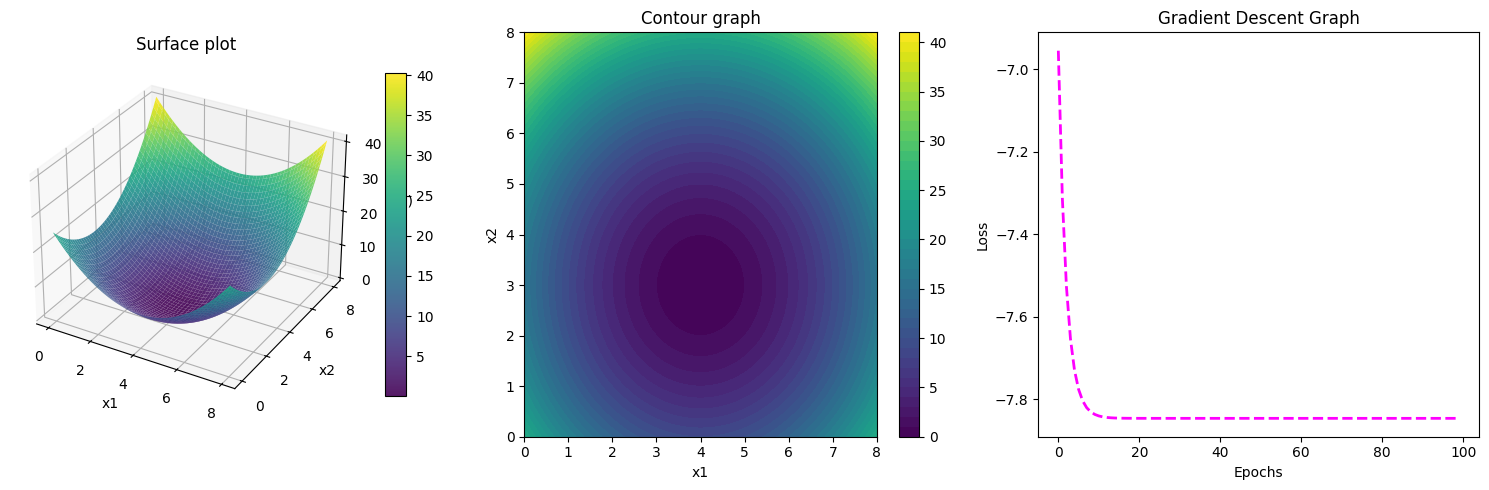

In [64]:
def g(x: np.ndarray) -> np.ndarray:
    if len(x) != 3:
        return "The equation need 3 X values"
    else:
        x1, x2, x3 = x[0,0], x[1,0], x[2,0]
        return (x1-4)**2 + (x2-3)**2 + 4*(x3-5)**4

def grad(x: np.ndarray) -> np.ndarray:
    if len(x) != 3:
        return "The equation need 3 X values"
    else:
        x1, x2, x3 = x[0,0], x[1,0], x[2,0]
        dx1 = 2*(x1-4)
        dx2 = 2*(x2-3)
        dx3 = 16*(x3-5)**3
        return np.array([[dx1], [dx2], [dx3]]).reshape((3,1))

def gradient_descent(x_init, lr=0.002, epochs=500):
    x = np.array(x_init, dtype=np.float64).reshape((3,1)).astype(np.float64)
    loss = []
    for i in range(epochs):
        loss.append(np.sum(g(x)))
        x -= grad(x) * lr   
    return x, loss


def plot_graph():
    x1 = np.linspace(0, 8, 100)
    x2 = np.linspace(0, 8, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = 5
    Z = np.zeros(X1.shape)

    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x_vec = np.array([[X1[i, j]], [X2[i, j]], [X3]])
            Z[i, j] = g(x_vec)
    
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1,3,1, projection="3d")
    s_plot = ax1.plot_surface(X1, X2, Z, cmap="viridis", alpha=0.9)
    ax1.set_title("Surface plot")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("g(x)")
    fig.colorbar(s_plot, ax=ax1, shrink=0.8, aspect=15)

    ax2 = fig.add_subplot(1,3,2)
    cont = ax2.contourf(X1, X2, Z, levels=50, cmap="viridis")
    ax2.set_title("Contour graph")
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    fig.colorbar(cont, ax=ax2)
    
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.plot(losses, c="magenta", lw=2, ls = "--")
    ax3.set_title("Gradient Descent Graph")
    ax3.set_xlabel("Epochs")
    ax3.set_ylabel("Loss")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    x_init = np.array([[4], [2], [-1]]) ### the coef of x
    print(f"g(x) = {g(x_init)}\n")
    print(f"grad(x) =\n {grad(x_init)}\n")

    x, loss = gradient_descent(x_init)
    print(f"Minimizer =\n {x}")

    # plot the contour and surface plot
    plot_graph()

## **The Curse of Dimensionalty**

- Search space grows exponentially as dimension increases. However, probabilistic distribution behave differently when they are in high dimensional settinf. For example, probability density of Gaussian Distribution with radius r from the origin

- This is various problems that arise when working with high dimensional data especially in ML and optimization gradient decent

#### **WHAT?!? and How??**
- As the number of features (dimensions) increases, the data becomes difficult to analyze and many algorithms including gradient decent become struggle.
- This can cause slow convergence. The surface of the cost function can become very flat making gradient decent take longer to converge or get stuck.
- Overfitting can occur. Model has more freedom to fit the training data too closely leading to poor generalization

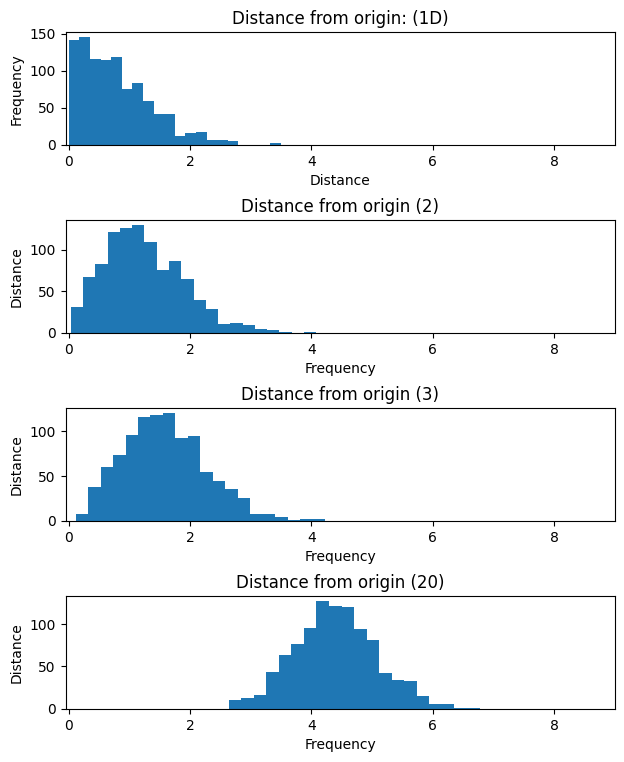

In [65]:
def radius(v):
    N, D = v.shape
    r = np.sqrt(np.sum(v**2, axis = 1))
    
    return r

def get_norm(num, ndim):
    x = np.random.normal(0, 1, num).reshape((-1, 1))
    if ndim == 1:
        x = np.random.normal(0, 1, num).reshape((-1, 1))

    else:
        mean = np.zeros((ndim, ))
        cov = np.identity(ndim)
        x = np.random.multivariate_normal(mean, cov, num)

    return x

if __name__ == "__main__":
    fig, ax = plt.subplots(4,1)
    fig.tight_layout(rect = [0.1, 0.1, 0.9, 0.9], h_pad=0.5, w_pad = 1)

    N = 1000
    Ds = [1, 2, 3, 20]

    ax[0].set_xlim((-0.05, 9))
    d = Ds[0]
    x = get_norm(N, d)
    ax[0].hist(radius(x), bins = 20)
    ax[0].set_title("Distance from origin: ({}D)".format(d))
    ax[0].set_xlabel("Distance")
    ax[0].set_ylabel("Frequency")

    for i, d in enumerate(Ds[1:]):
        ax[i+1].set_xlim((-0.05, 9))
        ax[i+1].set_title(f"Distance from origin ({d})")

        x = get_norm(N, d)
        ax[i+1].hist(radius(x), bins= 20)
        ax[i+1].set_ylabel("Distance")
        ax[i+1].set_xlabel("Frequency")

    fig.set_figwidth(8)
    fig.set_figheight(10)
    plt.show()

<hr/>

## **Part 9: Support Vector Machine (SVM)**

In a binary classification problem, a linear SVM tries to find a hyperplane that separates two classes.  

#### **Hyperplane equation**

$$
w^\top x + b = 0
$$

where:  
- $w \in \mathbb{R}^n$ is the **normal vector** to the hyperplane  
- $b \in \mathbb{R}$ is the **bias term** (offset)  
- $x \in \mathbb{R}^n$ is a point in the input space  

---

#### **3D plane equation**

The general equation of a plane in $\mathbb{R}^3$ is:

$$
ax + by + cz = d
$$

Let $(x_0, y_0, z_0)$ be a point on the plane, and $n = (a, b, c)$ the normal vector. Any point $(x, y, z)$ on the plane satisfies:

$$
n \cdot ((x, y, z) - (x_0, y_0, z_0)) = 0
$$

$$
a(x - x_0) + b(y - y_0) + c(z - z_0) = 0
$$

$$
ax + by + cz = ax_0 + by_0 + cz_0 = d
$$


$$
ax + by + cz = d
$$

<hr/>

#### **Hyperplane equation (N-dimensional)**

The hyperplane equation of  $\mathbb{R}^n$ is:

$$
L = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = 0
$$

Let $x_0 = (x_{01}, x_{02}, \dots, x_{0n})$ be a point on the hyperplane and $w = (w_1, w_2, \dots, w_n)$ the normal vector. 

Any point $x = (x_1, x_2, \dots, x_n)$ on the hyperplane satisfies:

$$
w \cdot (x - x_0) = 0
$$

$$
w_1(x_1 - x_{01}) + w_2(x_2 - x_{02}) + \dots + w_n(x_n - x_{0n}) = 0
$$

$$
w_1 x_1 + w_2 x_2 + \dots + w_n x_n = w_1 x_{01} + w_2 x_{02} + \dots + w_n x_{0n} = d
$$

$$
\therefore \quad w_1 x_1 + w_2 x_2 + \dots + w_n x_n - d = 0
$$

<hr/>

#### **SVM equation**

The SVM decision boundary is:

$$
w^\top x + b = 0
$$

Let $x_0$ be a point on the hyperplane and $w$ the normal vector. Any point $x$ on the hyperplane satisfies:

$$
w \cdot (x - x_0) = 0
$$

$$
w^\top x - w^\top x_0 = 0
$$

$$
w^\top x + b = 0 \quad \text{where} \quad b = -w^\top x_0
$$

$$
w^\top x + b = 0
$$


<hr/>

**Equation of y_hyperplane for SVM programming**

$$
b + w_1 x_1 + w_2 x_2 = 0
$$

From this, we will solve for $x_2$:

$$
w_2 x_2 = -(w_1 x_1 + b)
$$

$$
x_2 = -\frac{w_1 x_1 + b}{w_2}
$$

<hr/>

In [66]:
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, root_mean_squared_error, \
    accuracy_score, precision_score

In [67]:
cdf = pd.read_csv("D:/OneDrive/DME_2_FirstSem/IML/Datasets/TwoClassData.csv")
display(cdf.loc[:4]) #### This example, I only display first four

,3.353209,1.699580,1
0,1.366786,0.634972,1
1,0.224593,4.770282,0
2,0.443599,3.115309,0
3,2.768085,1.087829,1
4,1.255668,3.382041,0


In [68]:
data = cdf.to_numpy()
x = data[:, 0:2]
y = data[:, 2]

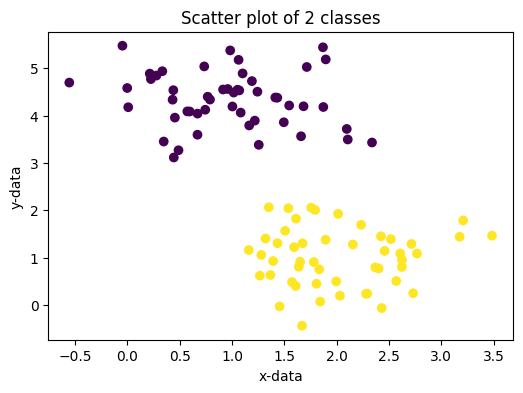

In [69]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title("Scatter plot of 2 classes")
plt.xlabel("x-data")
plt.ylabel("y-data")
plt.show()

In [70]:
svc = LinearSVC()
svc.fit(x, y)

LinearSVC()

In [71]:
svc.predict(np.array([[1,2]]))

array([1.])

In [72]:
b = svc.intercept_[0]
w1 = svc.coef_[0, 0]
w2 = svc.coef_[0, 1]

#### b + w1x1 + w2x2 = 0
x_line = np.linspace(x[:, 0].min(), x[:, 0].max(), num=50)
y_hyperplane = -(w1 * x_line + b) / w2

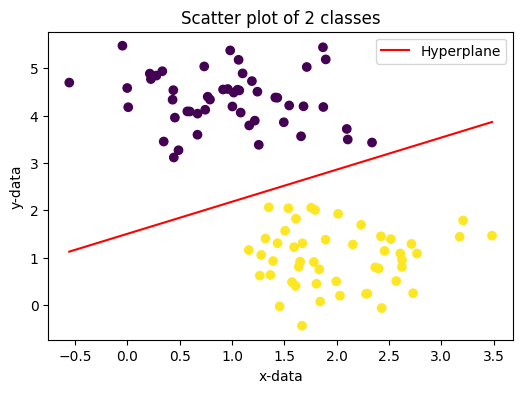

In [73]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.plot(x_line, y_hyperplane, c = "red", label = "Hyperplane")
plt.title("Scatter plot of 2 classes")
plt.xlabel("x-data")
plt.ylabel("y-data")
plt.legend()
plt.show()

#### **SVM with non linear kernel**

In [74]:
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

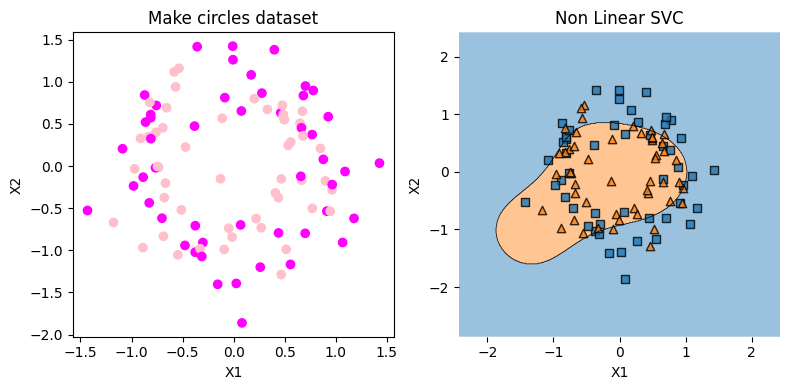

In [75]:
x, y = make_circles(n_samples=100, noise=0.25, random_state=0)
df = pd.DataFrame(x, columns=["X1", "X2"])
df["Y"] = y

color_map = {0: "magenta", 1: "pink"}
colors = df["Y"].map(color_map)

x_train, x_test, y_train, y_test = train_and_split(x, y, testsize=0.2, random_state=42)

model = SVC(kernel="rbf")  
model.fit(x_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(df["X1"], df["X2"], c=colors)
ax[0].set_xlabel("X1")
ax[0].set_ylabel("X2")
ax[0].set_title("Make circles dataset")

plot_decision_regions(x, y, clf=model, ax=ax[1], legend=0, X_highlight=None)
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")
ax[1].set_title("Non Linear SVC")

plt.tight_layout()
plt.show()

In [76]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse:.4f}")

MSE = 0.3000


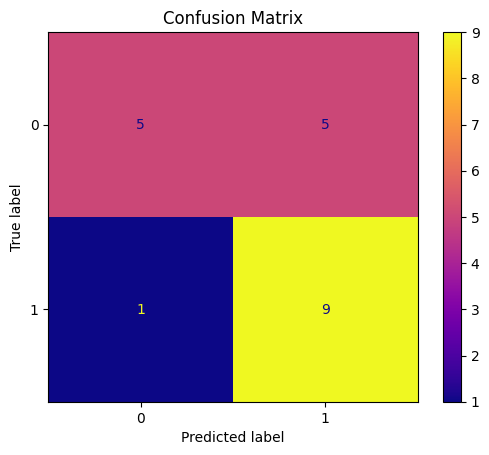

In [77]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat_display = ConfusionMatrixDisplay(con_mat)
con_mat_display.plot(cmap="plasma")
plt.title("Confusion Matrix")
plt.show()

<hr/>

## **Part 10: Stochastic Gradient Descent (SGD)**

In [78]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    mean_squared_error, mean_absolute_error

In [79]:
diabetes = load_breast_cancer()
x = diabetes.data[:, :2] ### let's select the first 2 col
y = diabetes.target

print(x.shape)
print(y.shape)

(569, 2)
(569,)


In [80]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [81]:
x_train, x_test, y_train, y_test = train_and_split(x_scaled, y, testsize=0.25, random_state=42)

sgd = SGDClassifier(max_iter=100, tol=1e-3)
sgd.fit(x_train, y_train)

SGDClassifier(max_iter=100)

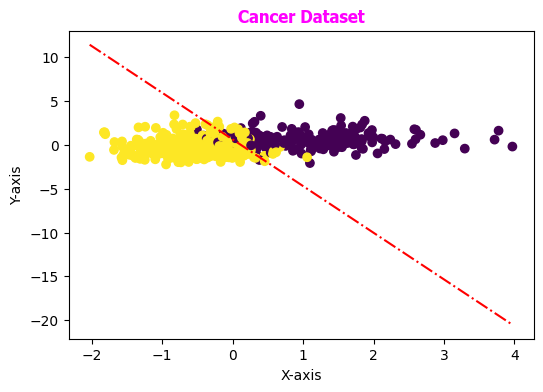

In [82]:
b = sgd.intercept_[0]
w1 = sgd.coef_[0, 0]
w2 = sgd.coef_[0, 1]

#### b + w1x1 + w2x2
x_line_graph = np.linspace(x_scaled[:, 0].min(), x_scaled[:, 0].max(), 150)
y_hyperplane = -(w1 * x_line_graph + b) / w2

#### plot the graph
plt.figure(figsize=(6,4))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y)
plt.plot(x_line_graph, y_hyperplane, c="red", ls="-.")
plt.title("Cancer Dataset", c="magenta", fontfamily="Tahoma", fontweight="bold")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [83]:
y_pred = sgd.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

ls_score_names = ["Precision", "Recall"]
ls_score = [precision, recall]
for i in range(len(ls_score)):
    print(f"{ls_score_names[i]}: {ls_score[i]}")

Precision: 0.8426966292134831
Recall: 0.9146341463414634


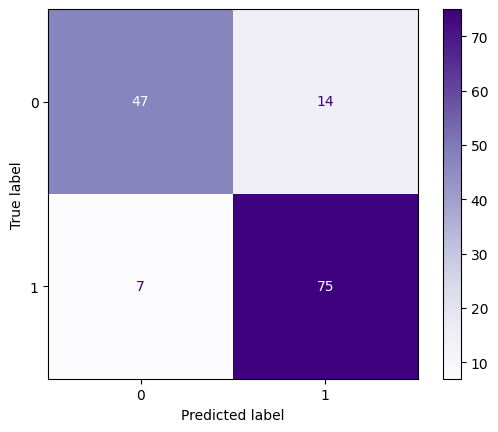

In [84]:
con_mat = confusion_matrix(y_test, y_pred)
display_matrix = ConfusionMatrixDisplay(con_mat)
display_matrix.plot(cmap = "Purples")
plt.show()

#### **Stochastic Gradient Descent from scratch**

In [85]:
def loss(x: np.ndarray, y: np.ndarray):
    return x**2 + y**2

def grad(x: np.ndarray, y: np.ndarray):
    return np.array([2*x, 2*y])

In [86]:
np.random.seed(42)
x, y = np.random.uniform(-4, 4, 2)
lr = 0.1
epochs = 100
path = [(x, y, loss(x, y))]

for i in range(epochs):
    g = grad(x, y)
    noise = np.random.normal(0, 0.3, 2)
    g_noise = g + noise
    x, y = x - (lr * g_noise)
    path.append((x, y, loss(x, y)))

path = np.array(path)

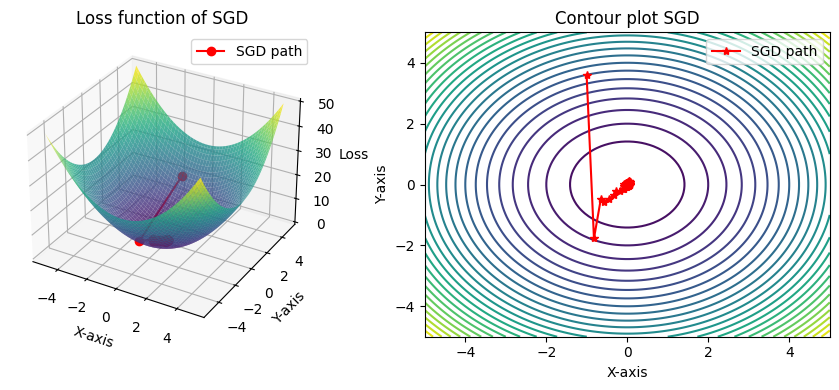

In [87]:
fig = plt.figure(figsize=(9,4))
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = loss(X, Y)

#### For now, I will plot the graph
ax1 = fig.add_subplot(1,2,1, projection="3d")
surface_plot = ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
ax1.plot(path[:, 0], path[:, 1], path[:, 2], c = "r", marker = "o", label = "SGD path")
ax1.set_title("Loss function of SGD")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Loss")
ax1.legend()

##### The contour plot
ax2 = fig.add_subplot(1,2,2)
ax2.contour(X, Y, Z, levels=30, cmap="viridis")
ax2.plot(path[:, 0], path[:, 1], c = "r", marker = "*", label = "SGD path")
ax2.set_title("Contour plot SGD")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.legend()

plt.tight_layout()
plt.show()

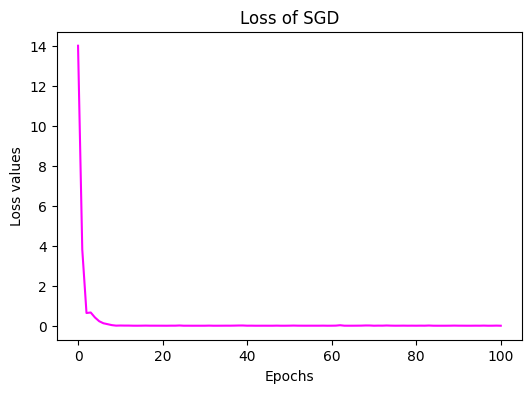

In [88]:
plt.figure(figsize=(6,4))
losses = path[:, 2]
plt.plot(range(len(losses)), losses, c="magenta")
plt.title("Loss of SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.show()

### **Continue next part: IML Part 3**